In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
# Creating the new dataframe from the extracted data
data = {
    'Date': ['Launch Date', 'Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5', 'Day 6'],
    'Count_devices_23': [632980, 345674, 234567, 987345, 234567, 876456, 231764],
    'Com_sum_23': [632980, 978654, 1213221, 2200566, 2435133, 3311589, 3543353],
    'Count_devices_24': [722980, 395674, 324567, 999345, 424567, 976456, 291764],
    'Com_sum_24': [1988940, 3708942, 5481297, 9668553, 12762820, 17927321, 21994202]
}
df = pd.DataFrame(data)

In [6]:
df.head()

,Date,Count_devices_23,Com_sum_23,Count_devices_24,Com_sum_24
0,Launch Date,632980,632980,722980,1988940
1,Day 1,345674,978654,395674,3708942
2,Day 2,234567,1213221,324567,5481297
3,Day 3,987345,2200566,999345,9668553
4,Day 4,234567,2435133,424567,12762820


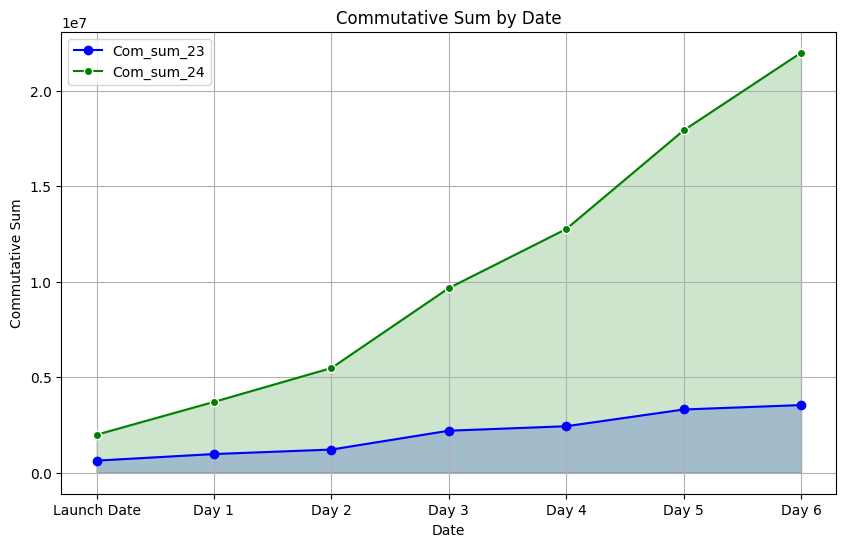

In [15]:
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt

# Convert the Com_sum columns to floats
df['Com_sum_23'] = df['Com_sum_23'].astype(float)
df['Com_sum_24'] = df['Com_sum_24'].astype(float)

# Create a numeric index for plotting
df['Index'] = range(len(df))

# Plotting the data for both Com_sum_23 and Com_sum_24 on a single chart with filled area under the lines
plt.figure(figsize=(10, 6))

# Plotting Com_sum_23 with shaded area
plt.plot(df['Index'], df['Com_sum_23'], color='blue', label='Com_sum_23', marker='o')
plt.fill_between(df['Index'], df['Com_sum_23'], color='blue', alpha=0.2)

# Plotting Com_sum_24 with shaded area
plt.plot(df['Index'], df['Com_sum_24'], color='green', label='Com_sum_24', marker='o',
         markerfacecolor='green', markeredgewidth=1, markeredgecolor='white')
plt.fill_between(df['Index'], df['Com_sum_24'], color='green', alpha=0.2)

# Convert the x-ticks back to the original date format for display
plt.xticks(ticks=df['Index'], labels=df['Date'])

plt.title('Commutative Sum by Date')
plt.xlabel('Date')
plt.ylabel('Commutative Sum')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

Donnut chart

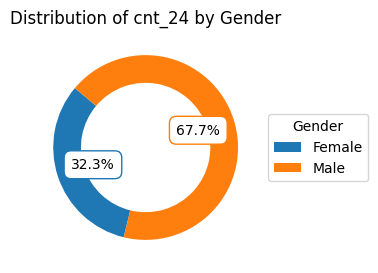

In [26]:
# Create a donut chart for cnt_24 with numbers in rectangular frames and the border the same color as the donut
plt.figure(figsize=(3, 3))
wedges, texts, autotexts = plt.pie(df_donut['cnt_24'], labels=None,
                                   autopct='%1.1f%%', startangle=140,
                                   wedgeprops=dict(width=0.3))

# Set the properties for the percentage texts
for i, autotext in enumerate(autotexts):
    autotext.set_color('black')
    autotext.set_bbox(dict(facecolor='white',
                           edgecolor=wedges[i].get_facecolor(),
                           boxstyle='round,pad=0.5'))

plt.legend(wedges, df_donut['Gender'], title="Gender", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Distribution of cnt_24 by Gender')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating the dataframe from the extracted data
data_new = {
    'Date': ['Launch Date', 'Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5', 'Day 6'],
    'ratio_23': [0.1, 0.3, 0.5, 0.7, 0.8, 0.9, 1.0],
    'ratio_24': [0.05, 0.3, 0.5, 0.6, 0.7, 0.9, 1.4]
}

df = pd.DataFrame(data_new)

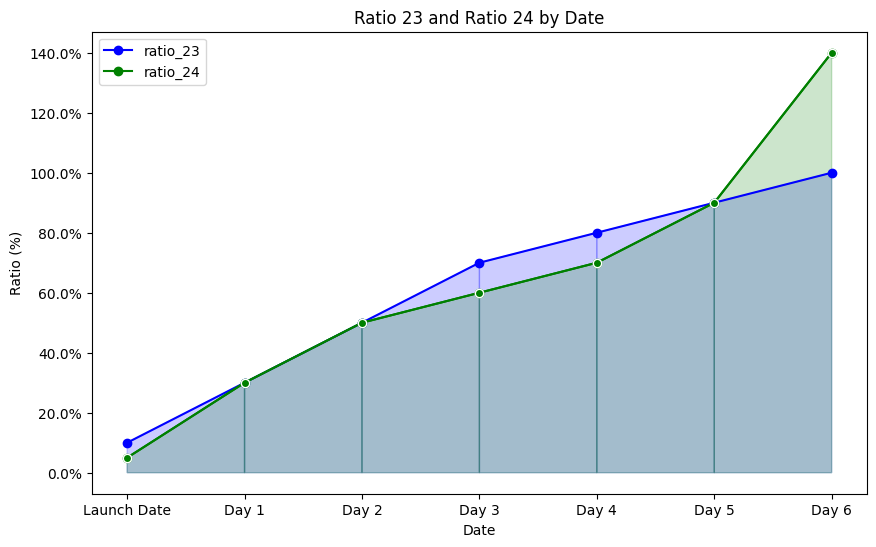

In [40]:
# Convert the 'ratio' columns to floats and percentages
df['ratio_23'] = df['ratio_23'].astype(float)
df['ratio_24'] = df['ratio_24'].astype(float)

# Create a numeric index for plotting
df['Index'] = range(len(df))

# Set the maximum value for the y-axis based on the max value in the data
y_max = max(df['ratio_23'].max(), df['ratio_24'].max())

# Create the plot with both ratio_23 and ratio_24 lines on the same chart with filled area under the lines
fig, ax = plt.subplots(figsize=(10, 6))

# Function to manually fill the area under the lines
def fill_area(ax, x, y, color, alpha=0.2, label=None):
    ax.plot(x, y, color=color, marker='o', label=label)
    for i in range(1, len(x)):
        ax.fill([x[i-1], x[i], x[i], x[i-1]], [0, 0, y[i], y[i-1]], color=color, alpha=alpha)

# Plotting ratio_23 with manual fill
fill_area(ax, df['Index'], df['ratio_23'], color='blue', label='ratio_23')

# Plotting ratio_24 with manual fill and white border for markers
fill_area(ax, df['Index'], df['ratio_24'], color='green', label='ratio_24')

ax.plot(df['Index'],
        df['ratio_24'],
        color='green',
        marker='o',
        markerfacecolor='green',
        markeredgewidth=1,
        markeredgecolor='white')

# Convert the x-ticks back to the original date format for display
plt.xticks(ticks=df['Index'], labels=df['Date'])

# Format y-axis to display percentages
plt.ylim(0, y_max)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}%'))

plt.title('Ratio 23 and Ratio 24 by Date')
plt.xlabel('Date')
plt.ylabel('Ratio (%)')
plt.legend()

# Show the plot
plt.show()